# What is Machine Learning?

* The definition at GeeksForGeeks is, Machine Learning is the field of study that gives computers the capability to learn without being explicitly programmed.
* Although this is a good enough definition, it does not fully paint a picture of what Machine Learning does.

## Let us see how machine learning compares to traditional mathematics. 

* In traditional mathematics, we are given a function ```f(x)``` and an input value ```x```. We compute the value of the function for the given input to compute ```y = f(x)```.

* But in Machine Learning, we are given a datset that contains a lot of entries of ```y```, corresponding to each given ```x```.
Our job is to create a function ```f(x)``` that closely matches the examples given <b>AND</b> makes useable predictions on new values of ```x``` that it has not seen before. This is how we use Machine Learning to make predictions! 

What I just explained, is Machine Learning in very basic, layman terms. Now, I'll try to familiarise you with some jargon that we will use quite frequently, going forward:
* The variable ```x``` is a known as a feature that is used to predict values of ```y```. It is also known as an independant variable because it does not depend on any other variable. A given dataset might have multiple features that we can use to predict the value of ```y```.
* The variable ```y``` is the label column that is to be predicted. It is also known as the dependant variable, for obvious reasons. There can be multiple ```y``` labels in a dataset and they might also be either continuous ```(Regression)``` or categorical ```(Classification)```.
* ```Regression and Classification``` are the two main types of problems in Machine Learning, and that is dependant upon the nature of the dependant variable ```y```.
* The function ```f(x)``` that we create to predict ```y``` as accurately as possible, is known as a ```Hypothesis```. In machine learning, all we have to really do, is find the best hypothesis function for the given dataset. 
* The given dataset is usually split into training and testing sets. It is trained on the training set and we optimize our model performance by checking how well it does on the test set. 
* And now, in the final point above, I have talked about making predictions on never before seen data; this process of taking our model from the train set to unseen data, is known as ```Generalization```. 
* For any model, we want it to generalize well so that it can make good predictions.

## Now, we'll talk about the most basic model in Machine Learning, ```Linear Regression```.
* Lets say we have a dataset that has only 2 columns, Population and Profit. And our job is to predict the Profit based on the Population. 



![](images/ScatterplotLR.jpeg)

* To calculate the best hypothesis, we need to find a straight line passing through the data that fits it best. 
* And here, we can see with our eyes that a straight line might fir this data well enough

Now, we dive into the mathematcs of Linear Regression here:
* We have to predict the value of y, given the training data.
* So, we have ```y = w * x + b```
* Where ```w``` is the slope of the line, which in Machine Learning terms is called the ```Weight```.
* Where ```b``` is the y-intercept of the line, which in Machine Learning terms is called the ```Bias```.
* Hence, we have our hypothesis, ```a linear combination of x```.
* ```w and b``` are called the parameters of Linear Regression and these are the values that we have to find, in order to get the best result.
* Traditionally, we initialize it to ```0```, and check how well our model performs.

![Title](images/BaseLineLR.jpeg)

MSE Loss for base model: 64.15

## Evaluating our model:
* We can evaluate our model performance by seeing how far the data points are, from the predicted Regression line. 
* This is known as computing the loss (also known as the cost) of our model. 
* There are a bunch of formulae we can use to compute this: 
    * Sum of Errors
    * Absolute Sum of Errors
    * Sum of Squared Errors
    * Mean Squared Error
    * Many more...
* So, every loss function is a combination of the difference between the true and predicted value (where the predicted value is a function of the weight and bias assumed initially).

## Training our model:
* Now that we have an initial approximation for the model and we have our loss function ready, we can start "Learning" the function. 
* Our goal is to minimise the loss function, in order to make our predictions better and our model more robust. 
* To do that, we take the derivative of the loss function and equate it to zero to get the minimal value of loss function. 
* But, our loss function has 2 variables in it, hence we take the partial derivative w.r.t both to get the minima. 
* This process is known as ```Stochastic Gradient Descent``` and is one of the most important concepts in the entirety of Machine Learning. 
* We now use the formula for Gradient descent to update the values of ```w and b``` in order to propogate towards the minima of the loss function. 
* Formula for gradient descent: <br><br>
![Hello](images/Gradient%20Descent%20Formula.png)
<br><br>
* Where theta in our case are the parameters, ```w and b```, and ```J``` is the loss function
* Here, alpha is the learning rate which decides how fast we move towards the gradient. This is known as a ```hyperparameter```. 
* A hyperparameter in Machine Learning, is a value we can tweak in order to find the value of the parameters. 

## Final model after training:

![Model](images/best_fit_line.jpeg)

* MSE Loss for our final model: 5.20
* We can clearly see that this line fits the data much better than our base line.

This is how Linear Regression works, visually. Now, let's see how to code it using a library called Sci-KitLearn, which handles all of the heavy math for us. So we can focus and building better models and not waste time debugging code everytime we want to write a new model. 

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'datasets/food_truck_data_works.csv') 
# This is a DataFrame, the core data structure of pandas library and the best way to store tabular data. 

x_train, y_train = np.array(df.iloc[:, 0]), np.array(df.iloc[:, 1])
x_train = np.reshape(x_train, (-1, 1))
y_train = np.reshape(y_train, (-1, 1))

df.head() # Prints the first 5 rows of the dataframe.

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [1]:
!pip install sklearn

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 360.0 kB/s eta 0:00:00
     -------------------------------------- 36.9/36.9 MB 340.9 kB/s eta 0:00:00
     -------------------------------------- 14.7/14.7 MB 505.6 kB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 1.7 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred)


print(f'Mean Squared Error using Linear Regression for the given dataset is: {mse}')

Mean Squared Error using Linear Regression for the given dataset is: 8.953942751950358


## Going from ```Linear Regression``` to ```Logistic Regression```

* Linear Regression is a model that predicts future values for continuous varibales. 
* But what if we want to classify things into 2 classes? Say Cat or Dog, Car vs Bike and much much more. 
* For this, we use a technique called ```Logistic Regression```. 
 
* In logistic Regression, we just do 1 extra step than Linear Regression, i.e, converting the output of regression into a bunch of probablities for the number of classes that we are trying to classify in. 

* For example, if we are predicting whether to approve a bank loan, based on attributes such as the applicants credit score, salary and more, we have 2 possible outputs: <b>```YES```</b> or <b>```NO```</b>
* The additional step here, is to convert the real valued regression output to 2 probabilites, the probability of YES and the probability of NO. Whichever is greater, is selected as the prediction. 

* The other difference in Logistic Regression comes in the loss function. 
* We can use a simple Mean Squared Error loss here as the output is just 1 (YES) or 0 (NO) because we dont have to compare probabilities, we have to compare the binary loss. 
* So, we use the log-loss function to obtain this. 

![log-loss-function](images/log_loss.png)

Let's look at the graph of the log-loss function to gain a better understanding of how it works.

![log-loss-graph](images/log_loss_graph.png)

* Once again, we take the derivative of this log function w.r.t our 2 parameters ```w and b``` to update their values using the concept of Gradient Descent. 

## Types of Gradient Descent
### There are 3 main ways of performing gradient descent:
1. Batch Gradient Descent
2. Mini-batch Gradient Descent 
3. Stochastic Gradient Descent

* And, Gradient Descent also depends on 1 other thing: The value we choose to initialise our parameters with. 
* In the Linear Regression Graph, we initialised ```w and b``` to be 0, and then updated their values after each iteration. 
* This works well enough for us, but in most complex cases, we initialize them randomly, rather than to zero, to reach the minimar faster.

## Finally, lets see how Logistic Regression works in code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
data = make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=45)
x_train = data[0]
y_train = data[1]

In [3]:
print(y_train)

[1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1]


![logistic-regression-data](images/linearly_sep_data.jpeg)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_train, y_train)

print(f'Accuracy score for the dataset using Logistic Regression is: {accuracy}')

Accuracy score for the dataset using Logistic Regression is: 0.93


* We have used a linear separator for the 2 classes. 
* The final split of the dataset is as follows:

![logistic-regression-sep](images/logistic-regression-soln.jpeg)

## To conclude (and introduce some more jargon):


## The Perceptron
![single-perceptron](images/perceptron.png)

* This is known as a single Perceptron or Neuron or even a Logit. This was created by Frank Rosenblatt in 1958.
* But, this just represents the firt half of our model - ```The Forward Pass```. 
* You can see that we are not updating the values of our parameters here using Gradient Descent. That is known as The Backward Pass.

## The Backward Pass

![backward-pass](images/forward-backward-pass.png)

* When we take a bunch of neurons together, and apply them to a dataset, we create a complete Neural Network!!
* And the backward pass is where the real magic of the Neural Network is. 
* A neural network consists of 1 input layer, 1 output layer, and multiple hidden layers in between.

## A fully complete Neural Network (A.K.A Artifical Neural Network)

![neural-network](images/neural-network-small.jpeg)

# MNIST using ANNs

## Importing MNIST + a little history

* MNIST consists of black & white images of 28 x 28 pixels each and a total of <b>70,000 images</b> (60,000 for training and 10,000 for testing).
* It was created by Yann LeCunn in 1988.
* It consists of digits from 0 - 9 taken from the US Postal Service. 
* It is known as the 'Hello World' into Deep Learning as most practitioners begin with the MNIST dataset.  

* The tensorflow library has a bunch of datasets built-in that we can directly call in our code. 
* They don't need to be downloaded externally from another source.

* We can check the <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/datasets">tf.keras.datasets</a> library to know more about the different datasets available.

In [2]:
!pip install tensorflow

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.



     ------------------------------------ 444.1/444.1 MB 142.5 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 575.8 kB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 609.2 kB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 551.1 kB/s eta 0:00:00
     ------------------------------------ 903.8/903.8 KB 697.0 kB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 579.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 42.6/42.6 KB 2.2 MB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 549.3 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 610.4 kB/s eta 0:00:00
     ------------

In [9]:
import numpy as np
import tensorflow as tf


MNIST = tf.keras.datasets.mnist

# check documentation on tf.keras.datasets.mnist to know about how to load the dataset. 

(x_train, y_train), (x_test, y_test) = MNIST.load_data()

# The x_train and x_test variables contain the actual pixel values for all 784 pixels in each image.
# While the y_train and y_test variables contain the corresponding digit from 0 - 9. 

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

11490434/11490434 [==============================] - 21s 2us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


## Data Visualization

As we can see, the dataset is in the form of numpy arrays. Let us see what happens when we print a single 28 x 28 (2-d) array.

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

* This doesn't look anything like an image though, and we know that MNIST dataset consists of images of numbers from 0 - 9. 

* To plot these images, we will use the matplotlib library, which allows us to convert arrays of pixel values like above, into images that we can infer from easily.

Visualizing the dataset by plotting 6 random images

In [4]:
x_train[0]

NameError: name 'x_train' is not defined

In [14]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 579.2 kB/s eta 0:00:00
     ------------------------------------ 930.9/930.9 KB 685.0 kB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 KB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 585.3 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


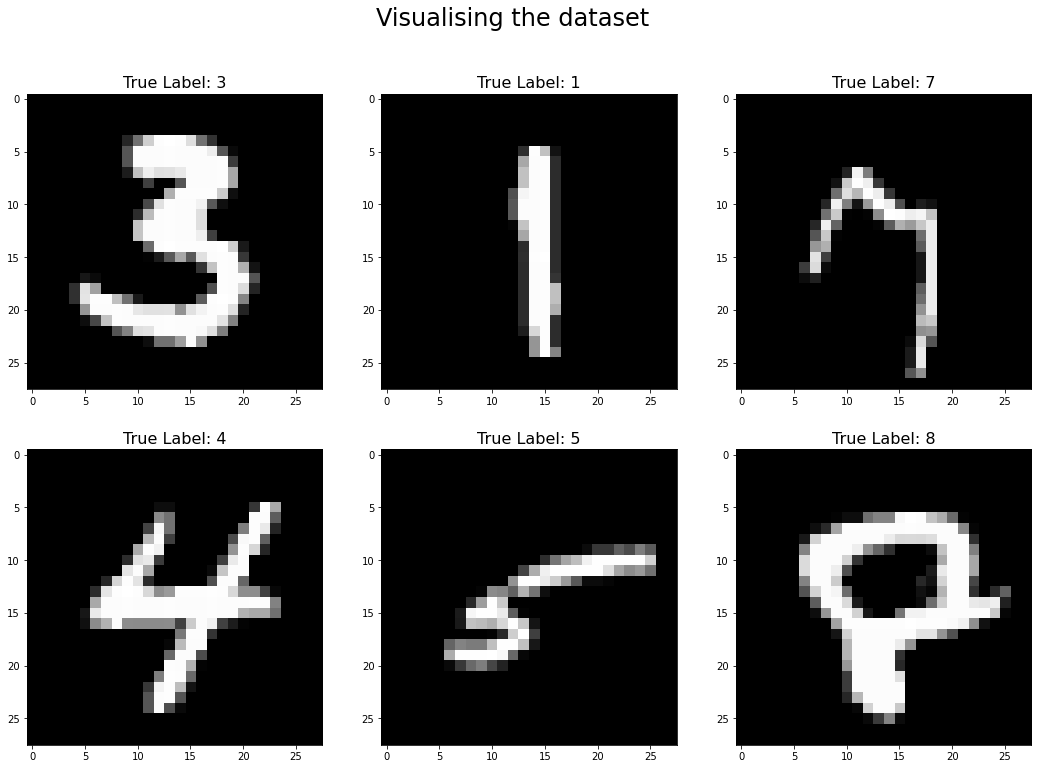

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i in range(2):
    for j in range(3):
        index = np.random.randint(0, 60000)
        ax[i, j].imshow(x_train[index], cmap='gray')
        ax[i, j].set_title(f'True Label: {y_train[index]}', fontsize=16)
        index += 1

plt.suptitle('Visualising the dataset', fontsize=24)
plt.show()

* Here, we visualized the dataset by plotting their images using the <b>matplotlib</b> library. 

* The imshow() function converts the numpy arrays that the images originally are, into their correct pixel values and creates their images.

## Data Transformation

* Now, we saw above while printing the numpy array that each image consists of pixel values from 0 - 255. And as we learned at the start of this workshop in Simple Linear Regression, bigger values skew the results towards their side even though they might not necessarily be more important. 

* For example, in a 28 x 28 image of a digit, the black pixels surrounding the number are also just as important as the white pixels that make-up the number.

* So, to counter this, we transform our data from pixel values of 0-255, to pixel values scaled down to 0-1. 

In [13]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Model Building

* Now comes the most exciting part of the entire ML journey...drumroll🥁... Building the ANN Model !!

* First, let's get over the jargon and syntax essential to build a model using tensorflow.

* As we can see, building a deep learning model using tensorflow is not coding heavy at all. 

* Infact, this is the simplest way to build a deep learning network and the best way to begin with. 

* We initialise the Sequential() model class from tensorflow which uses keras as it's backend. The Sequential() API allows us to add layers one after the other in a very intuitive way. 

* Using the Sequential() model, we don't need to create any Data Loaders, Batch Loaders, we don't need to create different classes and functions for each Dense/Dropout layers. 

* We can add new layers in the model by just using the model.add(layer) function.

* Tensorflow takes care of it all for us. 

* Now, the layers in a Neural Network consist of the following: <b>[JARGON ALERT]</b>

    * Flatten() - The Flatten() layer converts the 28 x 28, 2-dimensional input into a 784-length vector. 

    * Dense() - This is essentially the multi-layered perceptron we talked about. We can adjust the number of neurons/perceptrons in each Dense layer. For simplicity, I have just kept them as 64 neurons for both Dense() layers.
    
    * Dropout() - Randomly drops a given percentage of neuron values to ensure uniformity and curb overfitting. 

In [1]:
!pip install tensorfow

ERROR: Could not find a version that satisfies the requirement tensorfow (from versions: none)
ERROR: No matching distribution found for tensorfow
You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [17]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


model = Sequential()
model.add(Flatten(input_shape = x_train[0].shape))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2)) 
model.add(Dense(10, activation='softmax'))

* By printing out the model summary, we can see the output shape of each layer that acts as an input to the next layer. 

* We can also see that the output shape for the final layer is 10, which is the number of unique values in our dependant variable Y.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
____________________________________________________

* The total number of paramenters (that is the number of different weights and biases) are 55,000. Thought this might look like a huge number, this is miniscule compared to the Billions of parameters that State of the Art models are trained on. 

* Those models require tremendous computational power to train and are genreally trained on supercomputers connected to multiple GPUs at a time. 

* This requirement for huge computational power and longer training periods is what drives the cost for newer better State of the Art models to go up considerably. 

## Compiling and training the model

* Next, we compile and fit the data to the model created. 

* All of this just takes 2 lines of codes and nothing more!! That seems mind blowing to me till this day 🤯

* Explaining the optimizers and loss functions: <b>[JARGON ALERT]</b>

    * Loss function: What does ```sparse_categorical_crossentropy``` mean? 
        * Once again, we will simply refer the tensorflow documentation for this. Link <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy">here.</a>

        * We use this loss function when we are doing multi-label classification (2 or more label classes). We have 10 in our case, 0-9. 

        * For labels that are in a one-hot-encoded format, we use the ```CategoricalCrossentropy``` loss function. To know more about, one-hot-encoding, Link <a href = "https://www.educative.io/blog/one-hot-encoding">here.</a>

    * Optimizer: 
        * As explained above in Simple Linear Regression, we optimize our parameters (weights and biases) using a method called Gradient Descent. 

        * The different hyperparameters in the Gradient Descenet Algorithm include the learning rate and methods on how to initialise the weights and bias. 

        * This is where the ```Adam``` optimizer comes in - It has pre-defined values for learning rate and other hyperparameters which work well enough for our case!

        * More on the ```Adam``` optimizer can be found <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam">here.</a>

In [18]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 14s 4ms/step - loss: 0.6947 - accuracy: 0.8006 - val_loss: 0.2736 - val_accuracy: 0.9208
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3035 - accuracy: 0.9121 - val_loss: 0.2003 - val_accuracy: 0.9384
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2437 - accuracy: 0.9287 - val_loss: 0.1692 - val_accuracy: 0.9489
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2099 - accuracy: 0.9380 - val_loss: 0.1497 - val_accuracy: 0.9547
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1872 - accuracy: 0.9442 - val_loss: 0.1332 - val_accuracy: 0.9601
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1706 - accuracy: 0.9491 - val_loss: 0.1249 - val_accuracy: 0.9624
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1588 - accuracy: 0.9526 - val_loss: 0.1171 - val_accuracy

## Viewing misclassified examples

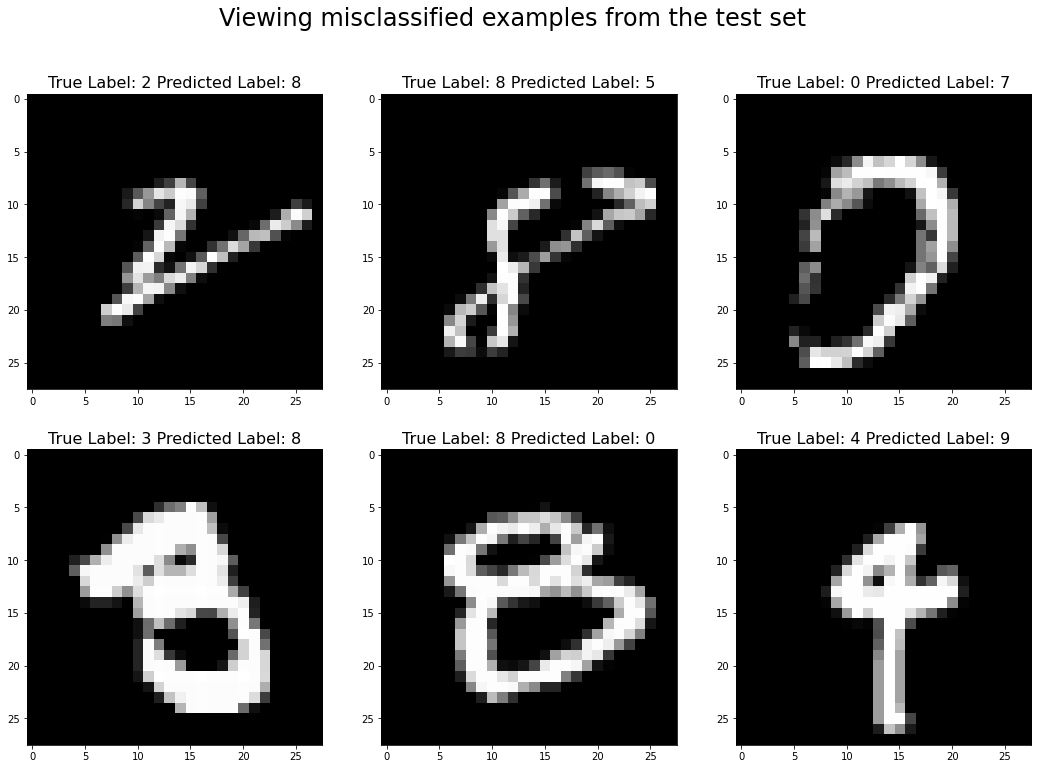

In [20]:
import random

model_predictions = model.predict(x_test).argmax(axis=1)

misclassified_examples = np.where(model_predictions != y_test)[0] # Since it returns a tuple containing an array.

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i in range(2):
    for j in range(3):
        index = random.choice(misclassified_examples)
        ax[i, j].imshow(x_test[index], cmap='gray')
        ax[i, j].set_title(f'True Label: {y_test[index]} Predicted Label: {model_predictions[index]}', fontsize=16)

plt.suptitle('Viewing misclassified examples from the test set', fontsize=24)
plt.show()

## Saving and Loading Model

* Tensorflow also has built-in modules that allow us to freeze the model parameters and save them for future use. 

In [76]:
# Saving and loading the model for future use:

from tensorflow.keras.models import load_model

model.save('MNIST_ANN.h5')

saved_model = load_model('MNIST_ANN.h5')

saved_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
____________________________________________________